In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# Load the dataset
file_path = 'C:/Users/olive/Documents/BDS/M3/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 n

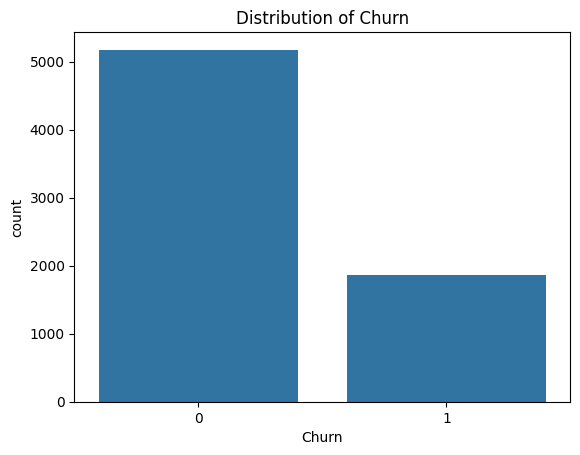

In [10]:
# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Distribution of target variable 'Churn'
print("\nDistribution of Churn:")
print(df['Churn'].value_counts(normalize=True))
sns.countplot(data=df, x='Churn')
plt.title("Distribution of Churn")
plt.show()

In [13]:
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


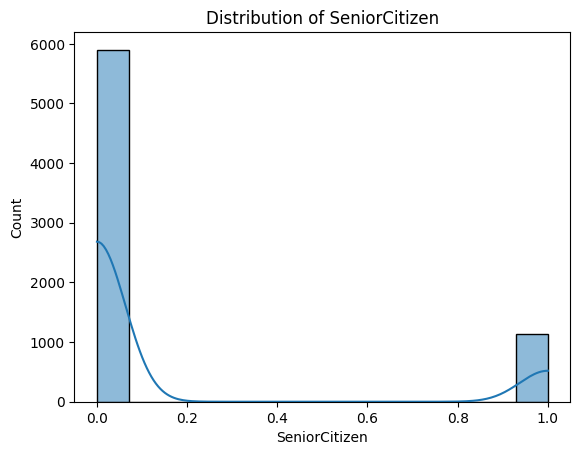

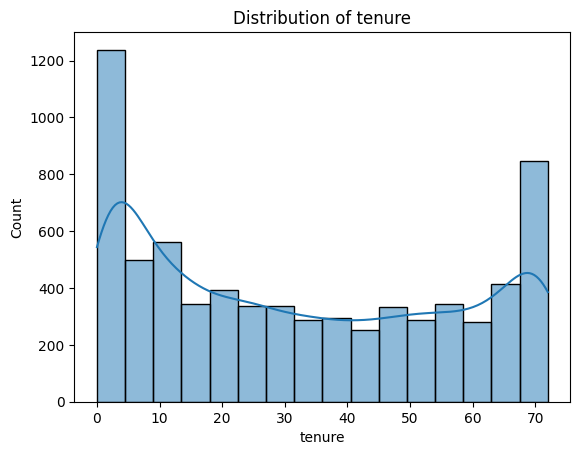

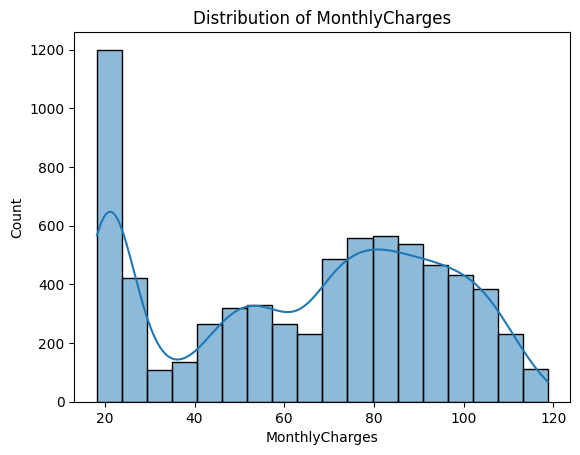

C:\Users\olive\AppData\Local\Temp\ipykernel_27124\1643474139.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[column] = pd.to_numeric(df[column], errors='ignore')


In [4]:
# Visualizing numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_features:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

# Convert object columns with numeric data to proper numeric types
for column in df.select_dtypes(include=['object']).columns:
    try:
        df[column] = pd.to_numeric(df[column], errors='ignore')
    except ValueError:
        pass

# Encode categorical variables for feature importance analysis
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


Feature Importance:
tenure: 0.1542
MonthlyCharges: 0.1421
TotalCharges: 0.1351
customerID: 0.1301
Contract: 0.0823
OnlineSecurity: 0.0465
PaymentMethod: 0.0445


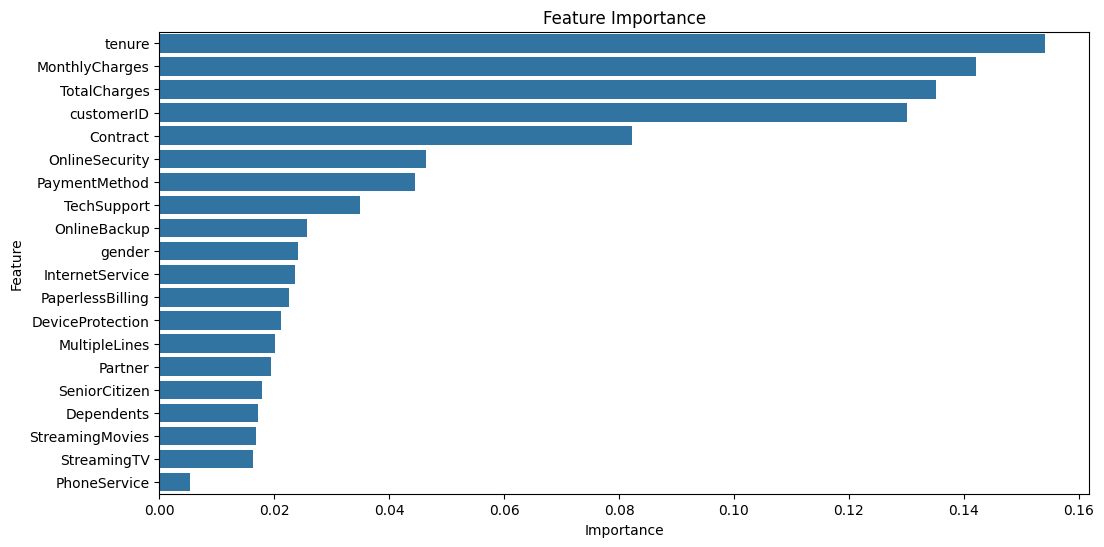

In [5]:
# Feature importance using Random Forest
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nFeature Importance:")
important_features = []
for i in indices:
    if importances[i] > 0.04:
        print(f"{X.columns[i]}: {importances[i]:.4f}")
        important_features.append(X.columns[i])

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

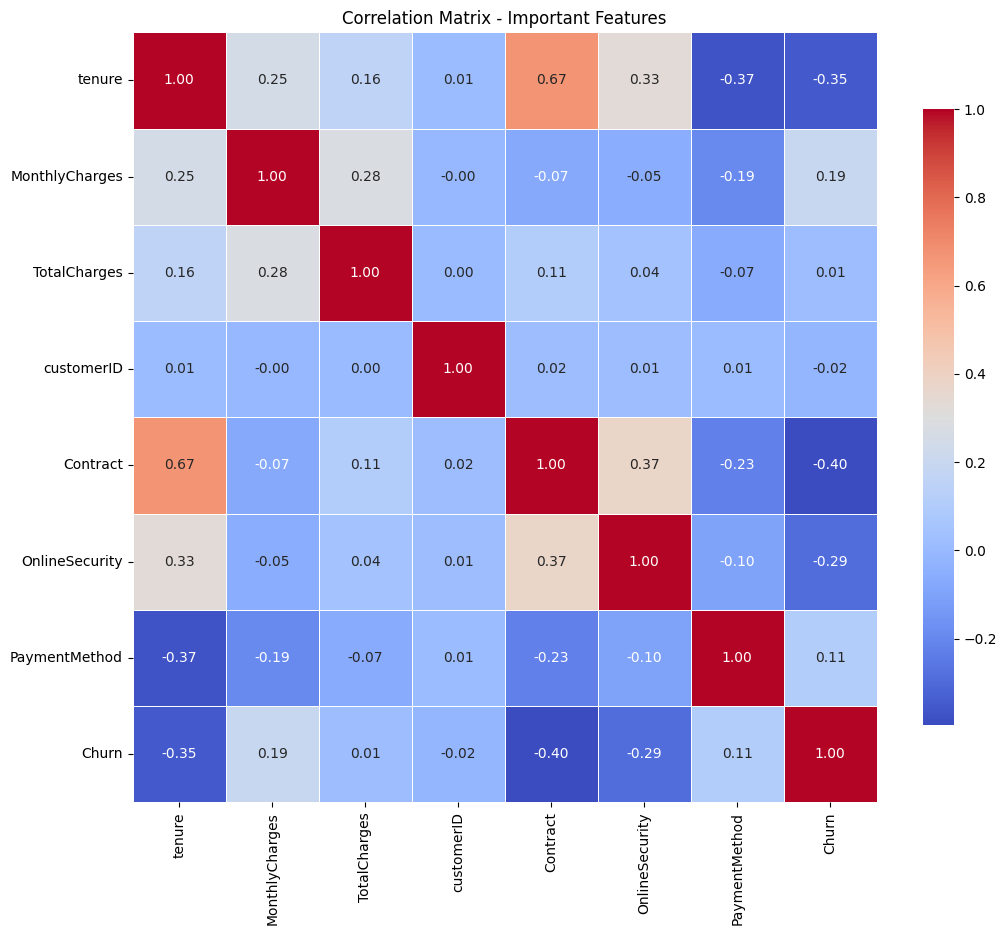

In [6]:
# Analyzing correlations - Only important features
correlation_matrix = df[important_features + ['Churn']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=False, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix - Important Features")
plt.show()


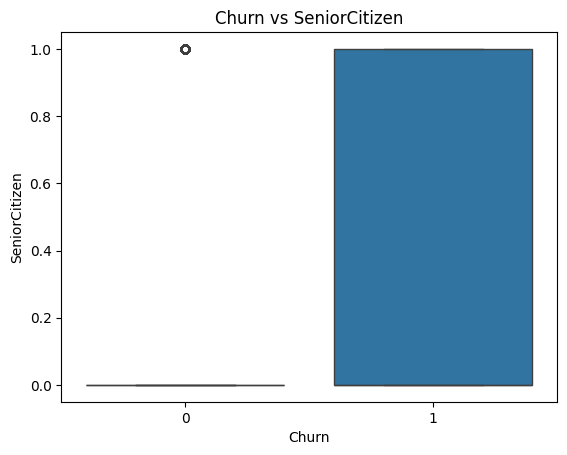

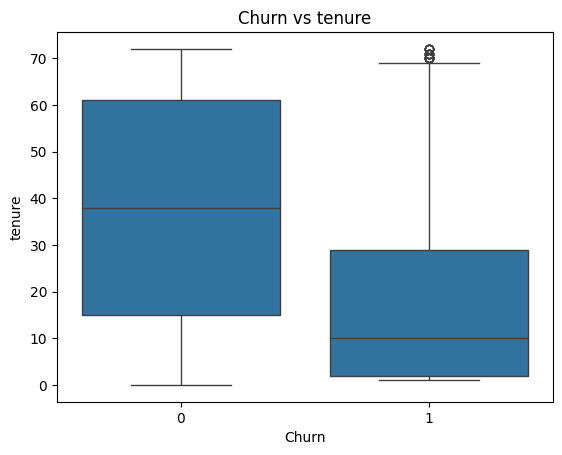

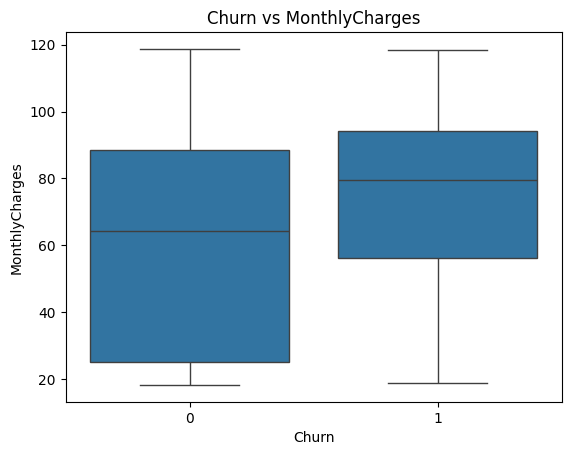

In [7]:
# Visualizing categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for column in categorical_features:
    plt.figure()
    sns.countplot(data=df, y=column, order=df[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.show()

# Analyzing relationships with Churn
for column in categorical_features:
    if column != 'Churn':
        plt.figure()
        sns.countplot(data=df, x=column, hue='Churn')
        plt.title(f"Churn vs {column}")
        plt.xticks(rotation=45)
        plt.show()

for column in numerical_features:
    plt.figure()
    sns.boxplot(data=df, x='Churn', y=column)
    plt.title(f"Churn vs {column}")
    plt.show()

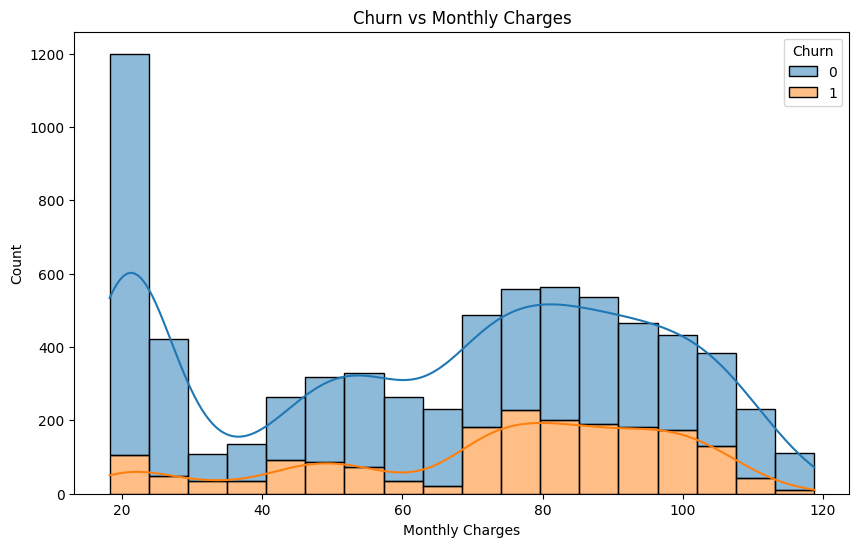

In [10]:
# Histogram of Churn vs MonthlyCharges
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, multiple='stack')
plt.title("Churn vs Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()
